# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
# Dataset shape
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("Image dimensions:", 

x_train.shape[1:])
print("Number of classes:", len(set(y_train.flatten())))

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Image dimensions: (32, 32, 3)
Number of classes: 100


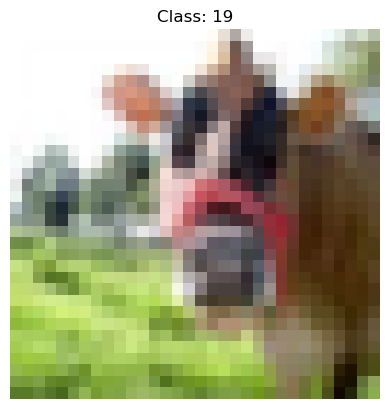

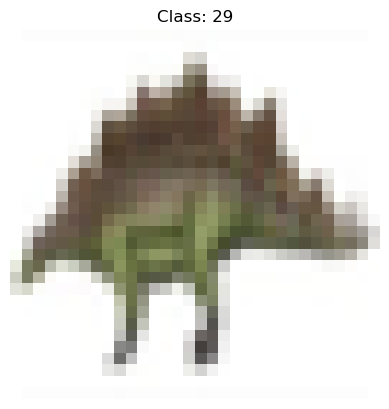

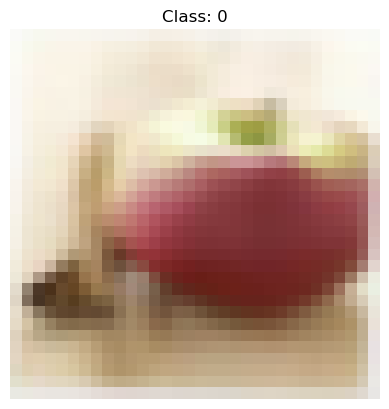

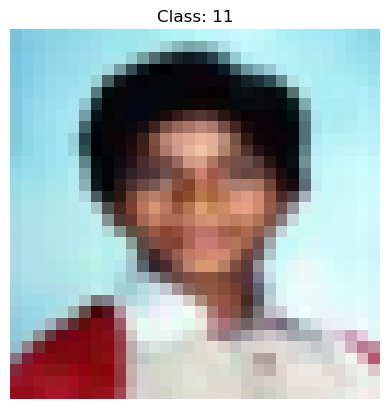

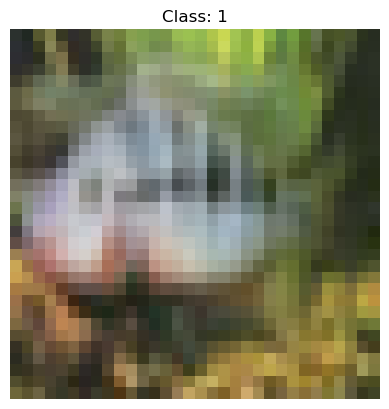

In [3]:
import matplotlib.pyplot as plt

# Show a few examples
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis("off")
    plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Normalize the pixel values to [0, 1]
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
from keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(set(y_train.flatten())))
y_test = to_categorical(y_test, num_classes=len(set(y_test.flatten())))

In [6]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Convolutional and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

# Dropout for regularization
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Output layer for 100 classes
model.add(Dense(100, activation='softmax'))

# Model summary
model.summary()


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 938,404 (3.58 MB)

 Trainable params: 938,404 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical_crossentropy was used because CIFAR-100 is a multi-class classification problem, and the labels are one-hot encoded. It measures the difference between the predicted and true probability distributions.

- <b>Optimizer:</b> Stochastic Gradient Descent (SGD) updates the model weights iteratively based on the gradient of the loss function with respect to the weights, using a subset (mini-batch) of the training data at each step.

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.SGD(),  loss='categorical_crossentropy', metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# I started with 10 Epochs but it only achieved 0.22 accuracy so I increased it to 20.
# It seems the accuracy and loss metrics continue to improve so another increase should only improve it.

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,  # Number of epochs
    batch_size=32
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.0123 - loss: 4.6005 - val_accuracy: 0.0305 - val_loss: 4.4859
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.0311 - loss: 4.4306 - val_accuracy: 0.0556 - val_loss: 4.1960
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.0576 - loss: 4.1883 - val_accuracy: 0.1010 - val_loss: 3.9590
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.0898 - loss: 3.9872 - val_accuracy: 0.1281 - val_loss: 3.7628
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.1191 - loss: 3.8183 - val_accuracy: 0.1538 - val_loss: 3.6333
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.1387 - loss: 3.6829 - val_accuracy: 0.1812 - val_loss: 3.4838
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.1637 - loss: 3.5652 - val_accuracy: 0.1974 - val_loss: 3.4044
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.1817 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> Measures the proportion of correctly classified test samples out of the total number of test samples.
- <b>Other metric:</b> Precision
- <b>Reason for selection:</b> Precision measures the ratio of correctly predicted positive labels to all predicted positive labels. It’s especially useful when we care more about the accuracy of positive predictions.
- <b>Value of metric:</b> 0.3496
- <b>Interpretation of metric value:</b> A precision value close to 1 means the model has fewer false positives. The value obtains means there are still a lot of false positives.

In [10]:
from sklearn.metrics import precision_score
import numpy as np

# Get predictions for the test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_true = np.argmax(y_test, axis=1)  # True class labels

# Calculate Precision
precision = precision_score(y_true, y_pred_classes, average='micro')
print("Precision:", precision)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Precision: 0.3481


In [ ]:
# Evaluate the model
test_metrics = model.evaluate(x_test, y_test, verbose=0)

# Report results
print("Accuracy:", test_metrics[1])

Accuracy: 0.3481000065803528


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

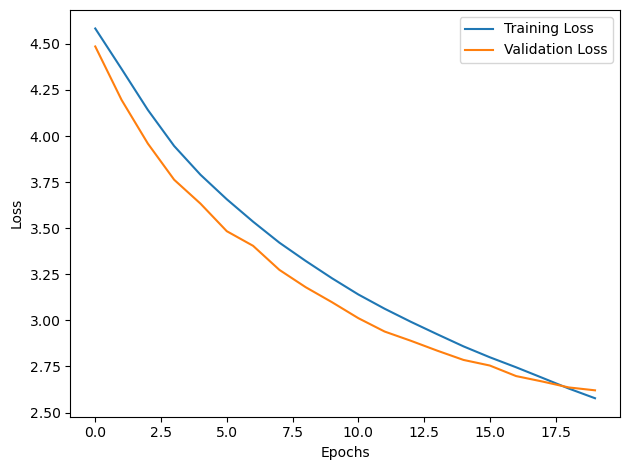

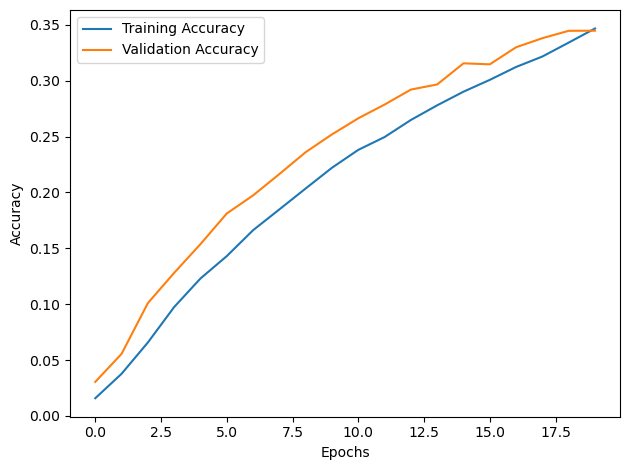

In [12]:
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

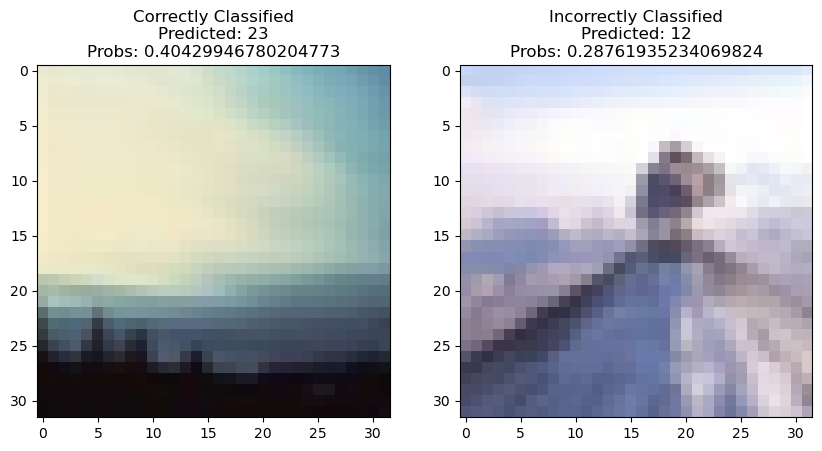

In [13]:
# Find correct and incorrect predictions
correct_idx = np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)
incorrect_idx = np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1)

# Select one correct and one incorrect image
correct_image = x_test[correct_idx][2]
incorrect_image = x_test[incorrect_idx][0]

# Get the predicted probabilities
correct_probs = y_pred[correct_idx][2]
incorrect_probs = y_pred[incorrect_idx][0]

# Plot the images and probabilities
plt.figure(figsize=(10, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"Correctly Classified\nPredicted: {np.argmax(correct_probs)}\nProbs: {correct_probs[np.argmax(correct_probs)]}")

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"Incorrectly Classified\nPredicted: {np.argmax(incorrect_probs)}\nProbs: {incorrect_probs[np.argmax(incorrect_probs)]}")

plt.show()

For the correct image, the model is confident (high probability) in its prediction.
For the incorrect image, the model is likely uncertain or confused, and the probability for the wrong class is still relatively high.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [20]:
# I chose to add momentum (0.9) to smooth out the learning oscillations.
# Momentum of 0.9 is commonly used because it strikes a balance between fast convergence and stability. 
# A high momentum helps the optimizer move faster in the relevant direction (accumulating past gradients), 
# but without overshooting. It reduces the impact of noisy gradients.

model.compile(optimizer=optimizers.SGD(momentum=0.9),  loss='categorical_crossentropy', metrics=['accuracy'])

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [21]:
# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,  # Number of epochs
    batch_size=32
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.0099 - loss: 4.6531 - val_accuracy: 0.0089 - val_loss: 4.6142
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.0090 - loss: 4.6106 - val_accuracy: 0.0089 - val_loss: 4.6079
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.0101 - loss: 4.6060 - val_accuracy: 0.0092 - val_loss: 4.6070
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.0088 - loss: 4.6058 - val_accuracy: 0.0082 - val_loss: 4.6068
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.0095 - loss: 4.6058 - val_accuracy: 0.0086 - val_loss: 4.6070
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.0104 - loss: 4.6056 - val_accuracy: 0.0082 - val_loss: 4.6070
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.0108 - loss: 4.6056 - val_accuracy: 0.0082 - val_loss: 4.6068
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.0109 -

In [22]:
from sklearn.metrics import precision_score
import numpy as np

# Get predictions for the test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_true = np.argmax(y_test, axis=1)  # True class labels

# Calculate Precision
precision1 = precision_score(y_true, y_pred_classes, average='micro')
print("Original Precision:", precision)
print("Updated Precision:", precision1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Original Precision: 0.3481
Updated Precision: 0.01


In [23]:
# Evaluate the model
test_metrics1 = model.evaluate(x_test, y_test, verbose=0)

# Report results
print("Original Accuracy:", test_metrics[1]) 
print("Updated Accuracy:", test_metrics1[1])

Original Accuracy: 0.3481000065803528
Updated Accuracy: 0.009999999776482582


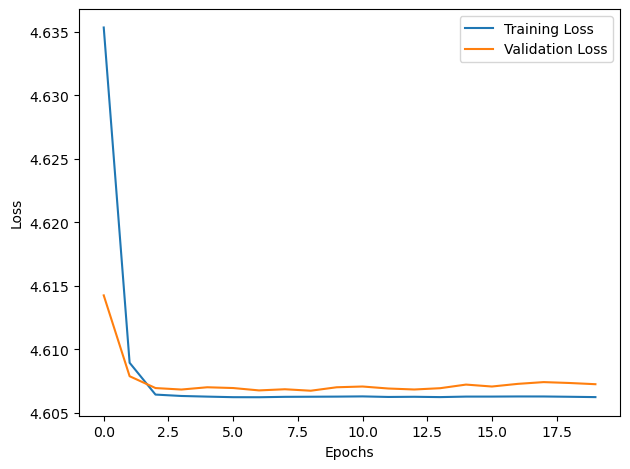

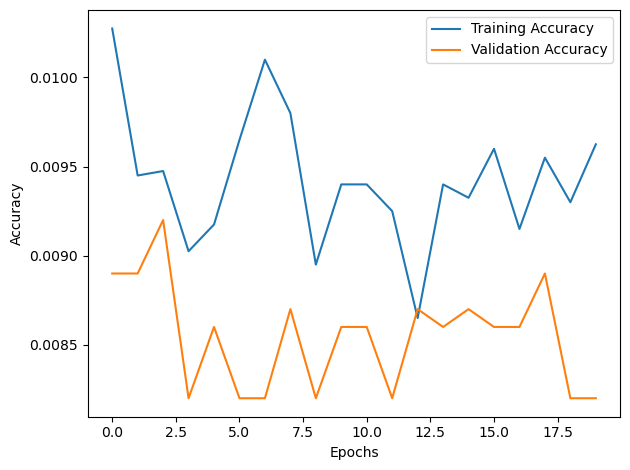

In [24]:
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

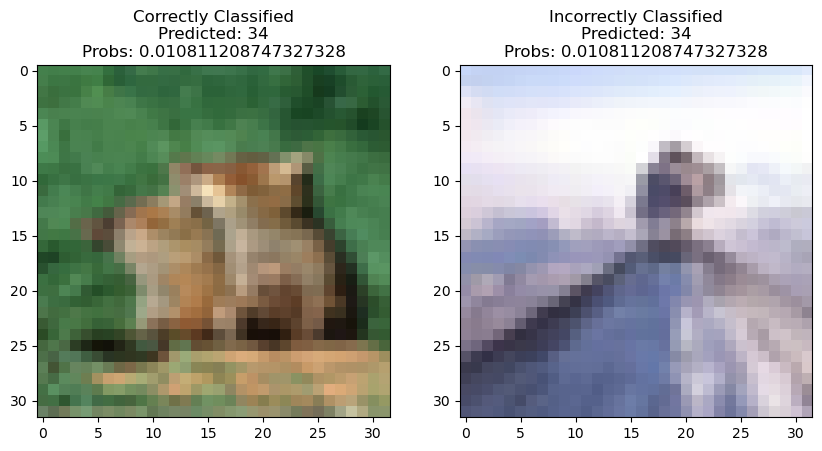

In [25]:
# Find correct and incorrect predictions
correct_idx = np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)
incorrect_idx = np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1)

# Select one correct and one incorrect image
correct_image = x_test[correct_idx][2]
incorrect_image = x_test[incorrect_idx][0]

# Get the predicted probabilities
correct_probs = y_pred[correct_idx][2]
incorrect_probs = y_pred[incorrect_idx][0]

# Plot the images and probabilities
plt.figure(figsize=(10, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"Correctly Classified\nPredicted: {np.argmax(correct_probs)}\nProbs: {correct_probs[np.argmax(correct_probs)]}")

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"Incorrectly Classified\nPredicted: {np.argmax(incorrect_probs)}\nProbs: {incorrect_probs[np.argmax(incorrect_probs)]}")

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

#### Your answer here

After re-training the model with momentum added, the performance worsened compared to the previous model. The accuracy and precision, decreased, indicating that the model struggled to converge effectively. The learning rate remained the same, but the momentum value of 0.9 caused the optimizer to overshoot the optimal solution, resulting in unstable training and poor generalization. The oscillations in the training and validation accuracy graphs suggest that the model was not able to settle into a good global minimum. This could be due to the momentum value being too high, causing the model to "skip" over optimal weights during training. Given the degradation in performance, it is clear that adding momentum without adjusting other hyperparameters, such as the learning rate, can lead to less effective training. There is room for further improvement by experimenting with smaller momentum values (e.g., 0.7 or 0.5), or by reducing the learning rate slightly to prevent the optimizer from overshooting. Additionally, other techniques like learning rate schedules, data augmentation, and dropout might be useful for stabilizing the training and improving model generalization. In conclusion, while momentum can improve model convergence, careful tuning is essential to avoid negative effects on performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.